In [1]:
import adddeps
from matplotlib import pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import norm,normaltest, probplot

import pandas as pd
import sqlalchemy
from collections import defaultdict
# from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, IntSlider
import datetime
import importlib
from simulator import SimulatorMagnetic, SimulatorLennard
from simulator.models import Client, SimulationAlchemy as Simulation
from tqdm import tqdm
from utils.utils import standartize
import multiprocessing
from multiprocessing import Pool, cpu_count
from settings import HDF5_PATH
import h5py
import logging.config
import logging
import sys, os
matplotlib.rcParams["figure.dpi"] = 150
client = Client()

In [2]:
session = client.Session()

In [27]:
query = (session.query(Simulation.id, Simulation.particles, Simulation.E_init)
                 .where(Simulation.group_name=='GE 2.2')
                 .where(Simulation.L_init<0.001)
                 .where(Simulation.E_init>616)
                 .order_by(Simulation.start_time)).all()[:]
print(len(query))
print(sorted(set([x for _, _,x in query])))

1
[616.2371038421682]


In [29]:
item = client.query_simulation(id=query[0][0], full_load=False)

In [32]:
item.load_history()

In [40]:
rs = item.history["rs"]
vs = item.history["vs"]

In [53]:
rs.shape

(200001, 3, 343)

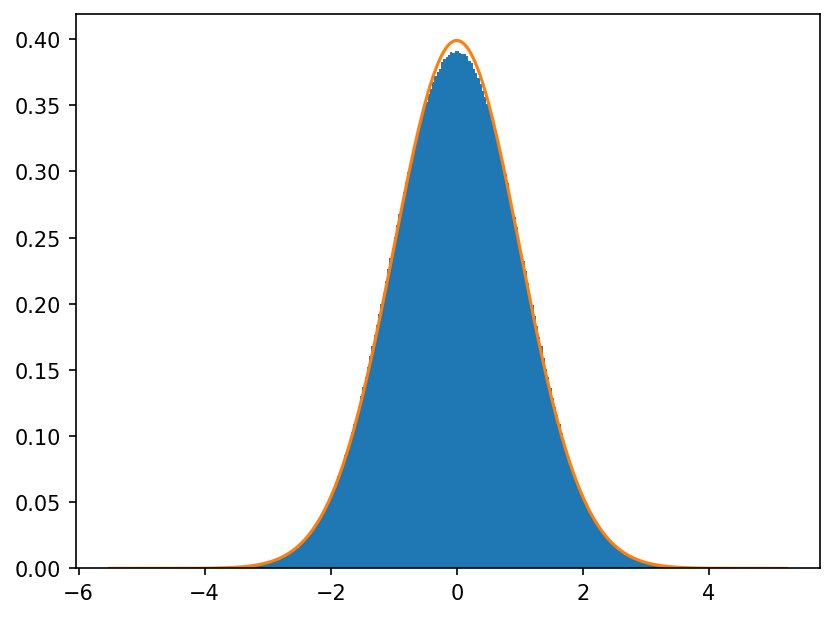

In [69]:
points = standartize(rs[100000:, 2, :].flatten())

_,xs,_ = plt.hist(points, bins=300, density=1)
plt.plot(xs, norm.pdf(xs, loc=0, scale=1))
# normaltest(residue[0])

In [70]:
((osm, osr), (slope, intercept, _r)) = probplot(points, dist="norm",)

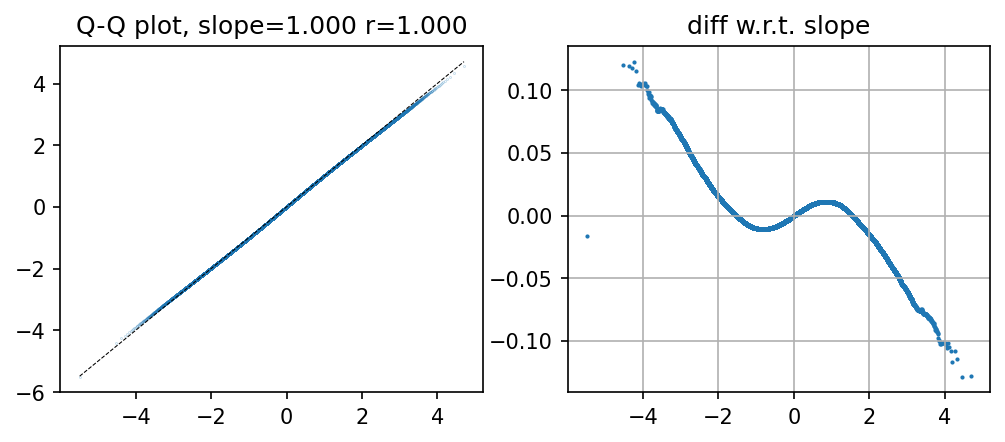

In [71]:
sp = 100
plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1);
plt.scatter(osm[::sp], osr[::sp], s=0.01)
plt.plot(osm[::sp], osm[::sp] * slope + intercept, ls="--", c="k", lw=0.51)
plt.title(f"Q-Q plot, slope={slope:0.3f} r={_r:0.3f}");

plt.subplot(1, 2, 2);
plt.title("diff w.r.t. slope")
plt.scatter(osm[::sp], osr[::sp]-(osm[::sp] * slope + intercept), s=1)
plt.grid()

(array([968., 886., 889., 876., 862., 839., 822., 802., 767., 748., 723.,
        696., 667., 641., 612., 590., 571., 538., 527., 500., 471., 465.,
        435., 421., 396., 389., 365., 356., 337., 327., 312., 297., 288.,
        281., 266., 261., 241., 241., 225., 219., 213., 204., 197., 188.,
        189., 177., 174., 164., 165., 156., 146., 145., 145., 134., 132.,
        127., 127., 113., 116., 111., 109., 104.,  98.,  99.,  98.,  86.,
         91.,  78.,  79.,  79.,  78.,  73.,  72.,  66.,  64.,  61.,  62.,
         54.,  54.,  54.,  49.,  47.,  43.,  40.,  41.,  37.,  32.,  34.,
         31.,  27.,  26.,  22.,  18.,  18.,  16.,  12.,  10.,   8.,   5.,
          5.]),
 array([-9.76996262e-15,  7.58217941e+00,  1.51643588e+01,  2.27465382e+01,
         3.03287177e+01,  3.79108971e+01,  4.54930765e+01,  5.30752559e+01,
         6.06574353e+01,  6.82396147e+01,  7.58217941e+01,  8.34039735e+01,
         9.09861530e+01,  9.85683324e+01,  1.06150512e+02,  1.13732691e+02,
         1.213

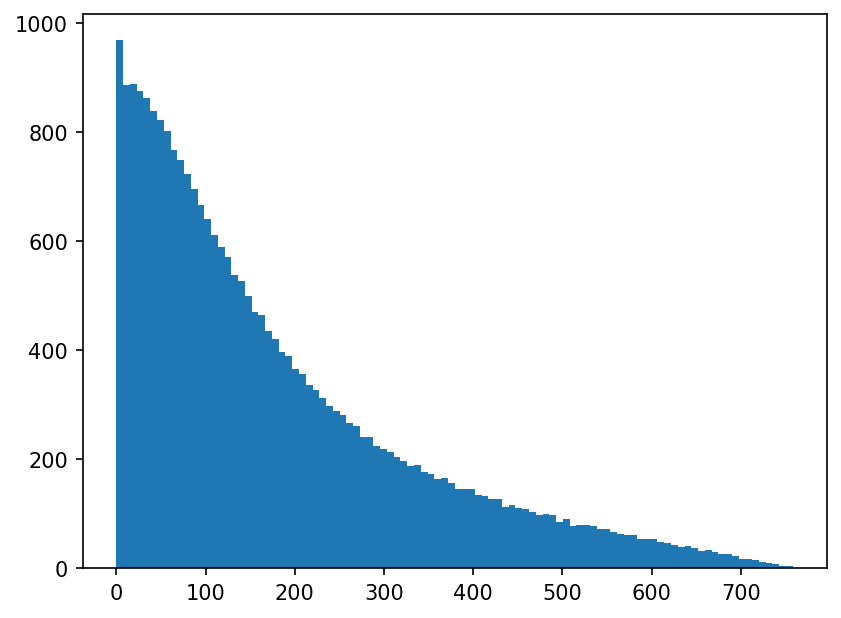

In [9]:
plt.hist([x for x, in query], bins=100)